In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# diabetes 이진분류 sigmoid pytorch 기본 스타

# 1. 데이터 로드
file_path = '/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/diabetes.csv'
data = pd.read_csv(file_path)

# 2. 데이터 확인
print(data.head())
print(data['Outcome'].value_counts())  # 클래스 분포

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
# 3. 특성과 레이블 분리
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [ ]:
# 4. 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 6. 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# 7. DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# 8. 모델 정의
class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.output(x))  # 이진 분류
        return x

model = DiabetesClassifier()


In [ ]:
# 9. 손실함수와 옵티마이저
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 10. 학습 루프
num_epochs = 30
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))


In [ ]:
    # 테스트 정확도
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    test_accuracies.append(acc * 100)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Test Accuracy: {acc*100:.2f}%")


Epoch [30/30], Loss: 0.4168, Test Accuracy: 82.47%


In [ ]:
# 11. 평가 지표 출력
f1 = f1_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

print("\n=== 평가 결과 ===")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


=== 평가 결과 ===
F1 Score: 0.70
Precision: 0.73
Recall: 0.68
Confusion Matrix:
[[95 12]
 [15 32]]


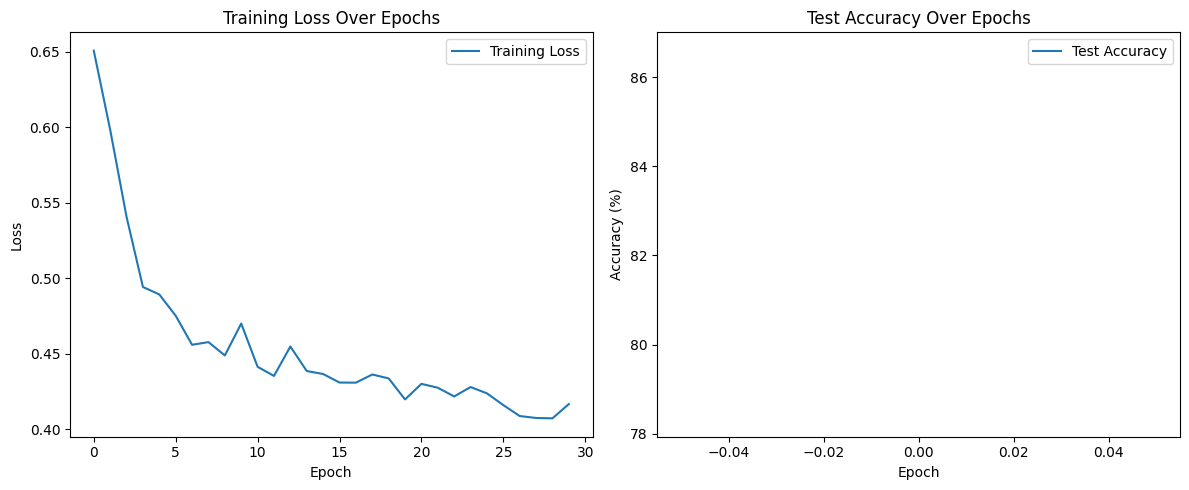

In [ ]:
# 12. 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#abalone_regression 스타일 딥러닝

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 로드
file_path = '/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/diabetes.csv'
data = pd.read_csv(file_path)

In [ ]:
# 2. 특성과 타겟 분리
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values.astype(np.float32)

In [ ]:
# 3. 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 4. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
# 6. 모델 정의 (nn.Sequential)
class DiabetesClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DiabetesClassifier(input_dim=X_train.shape[1]).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# 7. 학습 루프
train_losses = []
test_accuracies = []

for epoch in range(30):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # 테스트 정확도
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float().cpu().numpy()
            preds.extend(predicted)
            actuals.extend(y_batch.numpy())
    acc = accuracy_score(actuals, preds)
    test_accuracies.append(acc * 100)
    print(f"Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Accuracy: {acc*100:.2f}%")


Epoch 1, Loss: 0.6707, Accuracy: 72.73%
Epoch 2, Loss: 0.6208, Accuracy: 75.97%
Epoch 3, Loss: 0.5593, Accuracy: 78.57%
Epoch 4, Loss: 0.5006, Accuracy: 76.62%
Epoch 5, Loss: 0.4826, Accuracy: 75.32%
Epoch 6, Loss: 0.4664, Accuracy: 75.97%
Epoch 7, Loss: 0.4663, Accuracy: 76.62%
Epoch 8, Loss: 0.4607, Accuracy: 76.62%
Epoch 9, Loss: 0.4591, Accuracy: 75.97%
Epoch 10, Loss: 0.4424, Accuracy: 75.97%
Epoch 11, Loss: 0.4445, Accuracy: 74.68%
Epoch 12, Loss: 0.4419, Accuracy: 75.97%
Epoch 13, Loss: 0.4257, Accuracy: 74.03%
Epoch 14, Loss: 0.4358, Accuracy: 73.38%
Epoch 15, Loss: 0.4222, Accuracy: 74.03%
Epoch 16, Loss: 0.4213, Accuracy: 74.68%
Epoch 17, Loss: 0.4227, Accuracy: 74.03%
Epoch 18, Loss: 0.4102, Accuracy: 75.32%
Epoch 19, Loss: 0.4179, Accuracy: 75.32%
Epoch 20, Loss: 0.4404, Accuracy: 75.97%
Epoch 21, Loss: 0.4001, Accuracy: 74.68%
Epoch 22, Loss: 0.4126, Accuracy: 75.32%
Epoch 23, Loss: 0.4175, Accuracy: 75.32%
Epoch 24, Loss: 0.4094, Accuracy: 75.97%
Epoch 25, Loss: 0.4113, A

In [ ]:
# 8. 평가
f1 = f1_score(actuals, preds)
precision = precision_score(actuals, preds)
recall = recall_score(actuals, preds)
conf_matrix = confusion_matrix(actuals, preds)

print("\n=== 평가 결과 ===")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


=== 평가 결과 ===
F1 Score: 0.68
Precision: 0.69
Recall: 0.67
Confusion Matrix:
[[82 17]
 [18 37]]


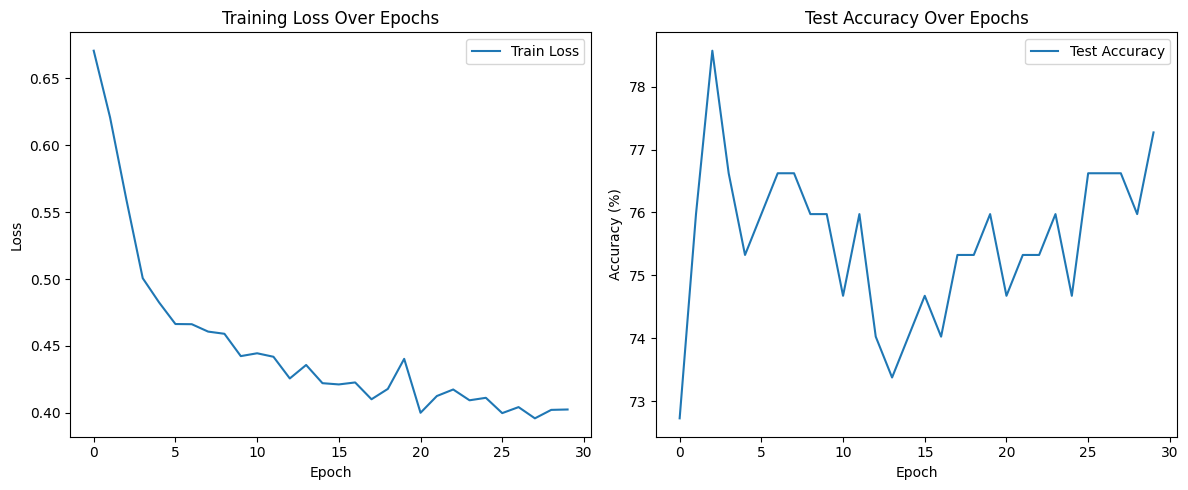

In [ ]:
# 9. 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()